In [1]:
import torch
import numpy as np
from sklearn.datasets import make_circles
import torch.nn as nn
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split


torch.manual_seed(0)
np.random.seed(0)

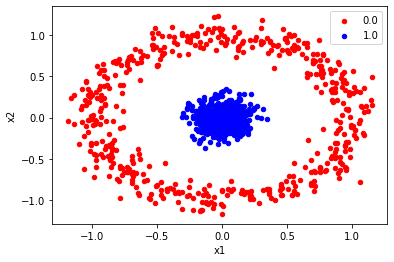

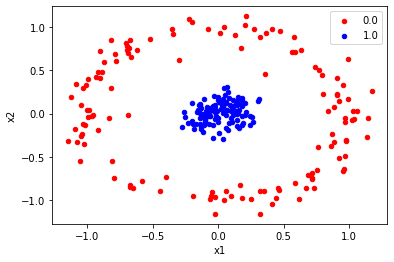

In [2]:
circles_dataset = make_circles(1500, factor=0.1, noise=0.1)
X_train, labels_train = circles_dataset
X = torch.FloatTensor(X_train)
labels = torch.FloatTensor(labels_train)

X_train, X_test, Y_train, Y_test = train_test_split(X, labels,test_size=(1-5/6), random_state=73)

X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train,test_size=(1-4/5), random_state=73)

df = pd.DataFrame(dict(x1=X_train[:, 0], x2=X_train[:, 1], y=Y_train))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
plt.show()

df = pd.DataFrame(dict(x1=X_test[:, 0], x2=X_test[:, 1], y=Y_test))
colors = {0:'red', 1:'blue'}
fig, ax = plt.subplots()
grouped = df.groupby('y')
for key, group in grouped:
    group.plot(ax=ax, kind='scatter', x='x1', y='x2', label=key, color = colors[key])
n_input_dim = X_train.shape[1]

plt.show()

In [4]:
dim = X_train.shape[1]
hidden1 = 30
hidden2 = 10 # Number of hidden nodes
n_output = 1 # Number of output nodes = for binary classifier
net = nn.Sequential(
  nn.Linear(dim, hidden2),
  nn.ELU(),
  nn.Linear(hidden2, hidden1),
  nn.ELU(),
  nn.Linear(hidden1, n_output), nn.Sigmoid()
)

loss_func = nn.BCELoss()
learning_rate = 0.01
optimizer = torch.optim.Adam(net.parameters(), lr=learning_rate)



0 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
Test 0 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(250) 250
10 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
20 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
Test 20 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(250) 250
30 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
40 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
Test 40 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(250) 250
50 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
60 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
Test 60 tensor(0.0002, grad_fn=<BinaryCrossEntropyBackward0>) tensor(250) 250
70 tensor(0.0001, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
80 tensor(0.0001, grad_fn=<BinaryCrossEntropyBackward0>) tensor(1000) 1000
Test 80 tensor(

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:31: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:201.)


Text(0.5, 1.0, 'Neural Network')

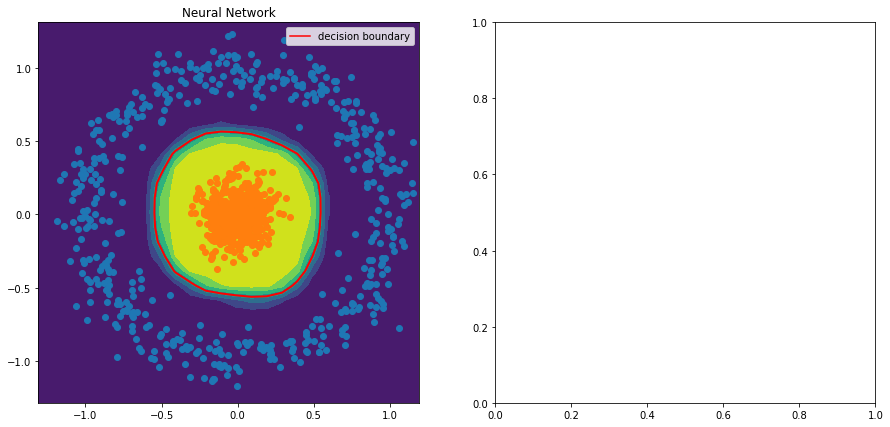

In [6]:
for epoch in range(400):
  optimizer.zero_grad()
  y_hat = net(X_train) 
  y_hat = y_hat.squeeze(dim=1)

  loss = loss_func(y_hat, Y_train)
  loss.backward()
  optimizer.step()
  if(epoch % 10 == 0):
    preds = y_hat >= 0.5
    reals = Y_train >= 0.5
    print(epoch, loss, torch.sum(preds.view(-1) == reals),Y_train.size(0))

  if(epoch % 20 == 0):
    reals = Y_test >= 0.5
    predTest = net(X_test)
    predTest = predTest >= 0.5
    print('Test', epoch, loss, torch.sum(predTest.view(-1) == reals),X_test.size(0))

grid_x, grid_y = torch.meshgrid(torch.arange(X_train[:,0].min()*1.1, X_train[:,0].max()*1.1, step=0.1),
                                torch.arange(X_train[:,1].min()*1.1, X_train[:,1].max()*1.1, step=0.1))
viz_x = torch.stack((grid_x, grid_y)).reshape(2, -1).transpose(1,0).float()
print(viz_x.dtype)
viz_y = net(viz_x).detach()
viz_y = viz_y.transpose(1,0).reshape(grid_x.shape).numpy()
fig, ax = plt.subplots(1,2, figsize=(15,7))

cs0 = ax[0].contourf(grid_x.numpy(), grid_y.numpy(), viz_y)
ax[0].contour(cs0, '--', levels=[0.5], colors='red', linewidths=2)
ax[0].plot(np.nan, label='decision boundary', color='red')
ax[0].scatter(X_train[np.where(Y_train==0),0], X_train[np.where(Y_train==0),1])
ax[0].scatter(X_train[np.where(Y_train==1),0], X_train[np.where(Y_train==1),1])
ax[0].legend()
ax[0].set_title('Neural Network')


KNN

In [7]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap


In [8]:
for n_neighbors in range(1,21):
  knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights='distance')
  knn.fit(X_train,Y_train)
  preds = knn.predict(X_train)
  predTest = preds >= 0.5
  print('Train', n_neighbors , accuracy_score(Y_train, predTest))
  preds2 = knn.predict(X_test)
  predTest = preds2 >= 0.5
  print('Test', n_neighbors, accuracy_score(Y_test, predTest))
  preds3 = knn.predict(X_val)
  predTest = preds3 >= 0.5
  print('Val', n_neighbors, accuracy_score(Y_val, predTest))

Train 1 1.0
Test 1 1.0
Val 1 1.0
Train 2 1.0
Test 2 1.0
Val 2 1.0
Train 3 1.0
Test 3 0.996
Val 3 1.0
Train 4 1.0
Test 4 0.996
Val 4 1.0
Train 5 1.0
Test 5 0.996
Val 5 1.0
Train 6 1.0
Test 6 1.0
Val 6 1.0
Train 7 1.0
Test 7 0.996
Val 7 1.0
Train 8 1.0
Test 8 1.0
Val 8 1.0
Train 9 1.0
Test 9 0.996
Val 9 1.0
Train 10 1.0
Test 10 0.996
Val 10 1.0
Train 11 1.0
Test 11 0.996
Val 11 1.0
Train 12 1.0
Test 12 0.996
Val 12 1.0
Train 13 1.0
Test 13 0.996
Val 13 1.0
Train 14 1.0
Test 14 0.996
Val 14 1.0
Train 15 1.0
Test 15 0.996
Val 15 1.0
Train 16 1.0
Test 16 0.996
Val 16 1.0
Train 17 1.0
Test 17 0.996
Val 17 1.0
Train 18 1.0
Test 18 0.996
Val 18 1.0
Train 19 1.0
Test 19 0.996
Val 19 1.0
Train 20 1.0
Test 20 0.996
Val 20 1.0


(-2.1698014736175537, 2.230194330215454)

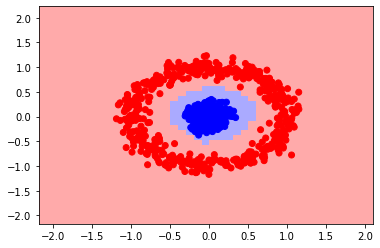

In [9]:
##CODE referred from 561
cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
knn = KNeighborsClassifier(n_neighbors=2, weights='distance')
knn.fit(X_train,Y_train)

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.1),np.arange(y_min, y_max, 0.1))

Z = knn.predict(np.c_[xx.ravel(), yy.ravel()])

Z = Z.reshape(xx.shape)
plt.figure()
plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

      #Plot also the training points
plt.scatter(X_train[:, 0], X_train[:, 1], c=Y_train, cmap=cmap_bold)
plt.xlim(xx.min(), xx.max())
plt.ylim(yy.min(), yy.max())
